# Correlation Analysis and Visualization Pipeline

This script performs correlation analysis between transformed/original features and a target variable (`e_total`), and visualizes the results using heatmaps and a composite image layout. The process is broken down into the following steps:

## 1. Imports and Setup

- Imports necessary modules including `CorrelationAnalyzer` from `CorrelationMatrix`, and suppresses warnings (e.g., `UserWarning`, `ConstantInputWarning`) for clean output.
- Sets up file paths for:
  - Transformed feature descriptors
  - Original feature descriptors
  - Factor loadings (for dimensionality reduction)
  - Target variable (e.g., `e_total`)
  - Output correlation result file


In [ ]:
from CorrelationMatrix import CorrelationAnalyzer
import pandas as pd
import warnings
from scipy.stats import ConstantInputWarning
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=ConstantInputWarning)
analyzer = CorrelationAnalyzer(
    descriptor_path_trans='./outputs/encoded_features/encodedOutputLayerExample.csv',
    descriptor_path_origin='./origin_data.csv',
    loadings_path='./../Feature-Lab/reduction_outputs/factor_loadings.csv',
    target_column='e_total',
    output_path='./outputs/correlation_results/correlation_results.csv'
)

## 2. Correlation Computation

- Initializes `CorrelationAnalyzer` with the specified inputs.
- Runs `analyzer.run_analysis()` to compute correlation values between features and the target.
- The results are saved into `./outputs/correlation_results/correlation_results.csv`.


In [ ]:
final_results = analyzer.run_analysis()
correlation_path = './outputs/correlation_results/correlation_results.csv'
correlation_matrix = pd.read_csv(correlation_path)

correlation_matrix

Correlation analysis completed and saved.


Feature  trans_Pearson  ...  origin_Kendall  origin_DistanceCorr
0            nsites      -0.219889  ...       -0.024880             0.081685
1         nelements      -0.298508  ...       -0.001542             0.021860
2            volume      -0.022075  ...        0.015255             0.058703
3           density       0.602586  ...        0.382438             0.423861
4    density_atomic       0.367974  ...        0.054449             0.086432
..              ...            ...  ...             ...                  ...
276   frac_dValence       0.492212  ...        0.095992             0.163413
277   frac_fValence       0.540548  ...        0.267791             0.328654
278    CanFormIonic      -0.730396  ...       -0.040752             0.051187
279    MaxIonicChar      -0.441312  ...       -0.066163             0.112365
280   MeanIonicChar      -0.483412  ...       -0.048518             0.104462

[281 rows x 9 columns]

## 3. Visualization Setup

- Customizes Matplotlib visual parameters using `plt.rcParams`, setting:
  - Font family to 'Times New Roman'
  - Font sizes for various elements like titles, labels, and ticks

- Defines a custom colormap `Cmap` with a linear gradient from dark gray to white to orange-red.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

colors = ['#464646','white', 'orangered']
Cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.titlesize'] = 20

## 4. Read and Preprocess Correlation Matrix

- Loads the correlation matrix from CSV.
- Separates columns into:
  - `trans_` prefixed columns (transformed features)
  - `origin_` prefixed columns (original features)
- Extracts:
  - `feature_labels`: The shared feature identifiers
  - `trans_labels` and `origin_labels`: Feature names without the prefix for display
- Sorts the correlation matrix by the last column (assumed to be sorted by correlation strength).


In [ ]:
correlation_matrix = pd.read_csv('./outputs/correlation_results/correlation_results.csv')
correlation_matrix = correlation_matrix.sort_values(by=correlation_matrix.columns[-1], ascending=True)
trans_columns = [col for col in correlation_matrix.columns if col.startswith('trans_')]
origin_columns = [col for col in correlation_matrix.columns if col.startswith('origin_')]

trans_data = correlation_matrix[trans_columns]
origin_data = correlation_matrix[origin_columns]

trans_labels = [col.replace('trans_', '') for col in trans_columns]
origin_labels = [col.replace('origin_', '') for col in origin_columns]
feature_labels = correlation_matrix['Feature']

## 5. Plot Transformed Feature Correlations

- Uses `seaborn.heatmap` to plot the correlation of transformed features (`trans_`) with the target.
- Adjusts:
  - Axis labels
  - Tick label rotation and font style (italic for x-axis)
  - X-ticks to display every 8th label for clarity
- Saves the figure as `./outputs/fig/CorrelationPlot/SD_correlation.png`.


In [ ]:
# Plot 1: Transformed Features
fig1, ax1 = plt.subplots(figsize=(14, 7))
sns.heatmap(
    trans_data.T,
    cmap=Cmap,
    ax=ax1,
    xticklabels=feature_labels,
    yticklabels=trans_labels,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'},
    vmin=-1, vmax=1  # Set colorbar limits
)
ax1.set_title('SD Correlation', pad=25, fontweight="bold")
ax1.set_ylabel('')

# Rotate y-axis tick labels 90 degrees clockwise
for tick in ax1.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontweight('bold')
    tick.set_rotation(0)

# Reduce number of x-ticks
xticks = ax1.get_xticks()
xticks_idx = xticks[::8].astype(int)
ax1.set_xticks(xticks[::8])
ax1.set_xticklabels([feature_labels[i] if i < len(feature_labels) else '' for i in xticks_idx])

for tick in ax1.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontweight('bold')
    tick.set_fontstyle('italic')

plt.tight_layout()
plt.savefig("./outputs/fig/CorrelationPlot/SD_correlation.png", dpi=600)
plt.show()
print("\n"*5)

## 6. Plot Original Feature Correlations

- Similar to the previous step, plots the correlation of original features (`origin_`) with the target.
- Saves the figure as `./outputs/fig/CorrelationPlot/OD_correlation.png`.


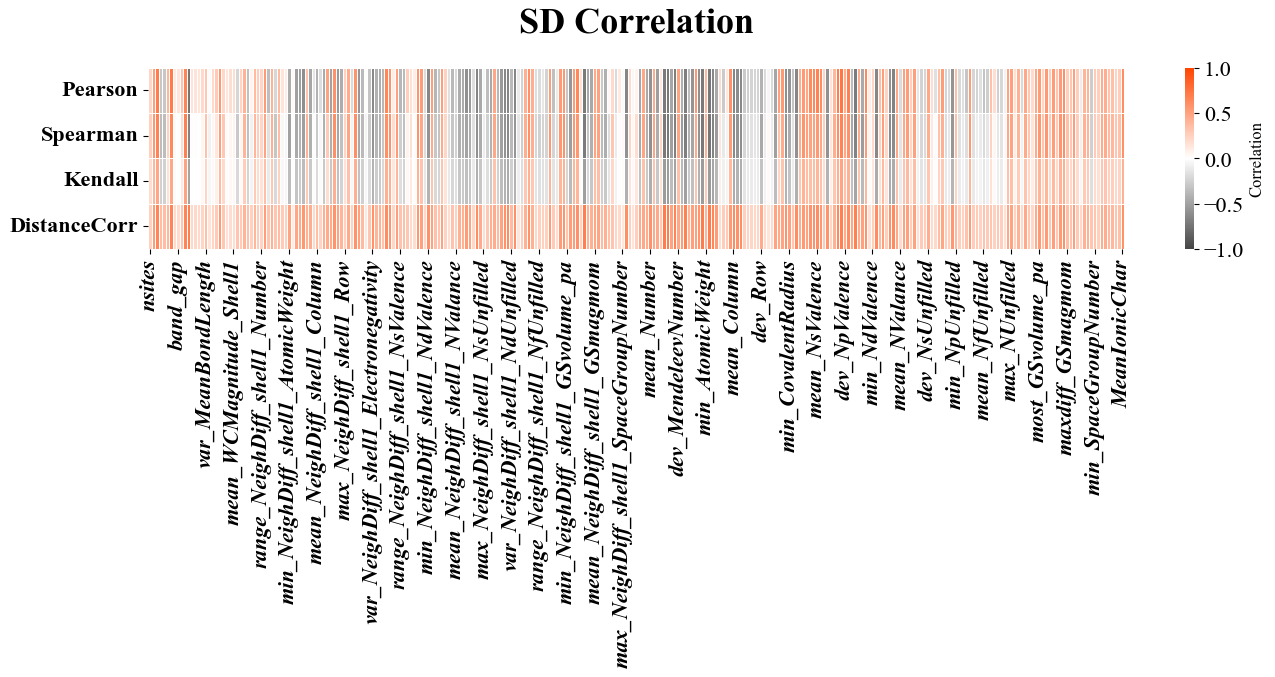

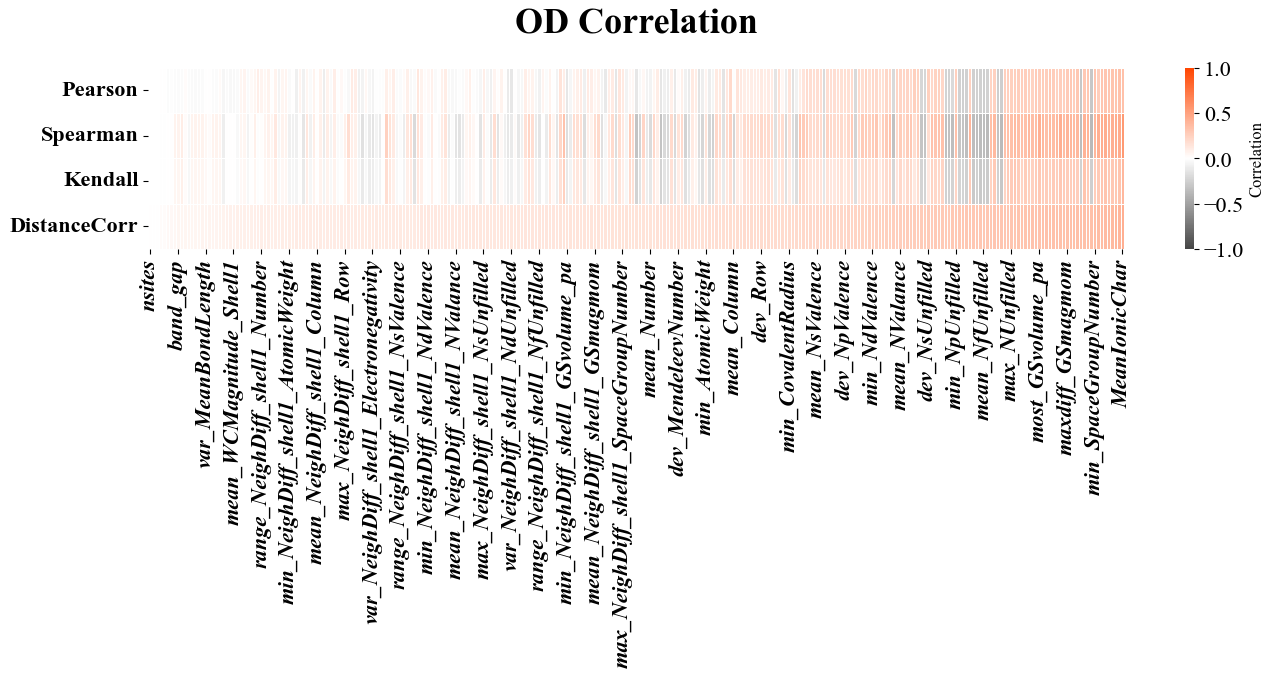

In [ ]:
# Plot 2: Original Features
fig2, ax2 = plt.subplots(figsize=(14, 7))
sns.heatmap(
    origin_data.T,
    cmap=Cmap,
    ax=ax2,
    xticklabels=feature_labels,
    yticklabels=origin_labels,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'},
    vmin=-1, vmax=1  # Set colorbar limits
)
ax2.set_title('OD Correlation', pad=25, fontweight="bold")
ax2.set_ylabel('')

# Rotate y-axis tick labels 90 degrees clockwise
for tick in ax2.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontweight('bold')
    tick.set_rotation(0)

# Reduce number of x-ticks
xticks = ax2.get_xticks()
xticks_idx = xticks[::8].astype(int)
ax2.set_xticks(xticks[::8])
ax2.set_xticklabels([feature_labels[i] if i < len(feature_labels) else '' for i in xticks_idx])

for tick in ax2.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontweight('bold')
    tick.set_fontstyle('italic')

plt.tight_layout()
plt.savefig("./outputs/fig/CorrelationPlot/OD_correlation.png", dpi=600)
plt.show()

## 7. Composite Visualization

- Loads the following images:
  - SD correlation heatmap
  - OD correlation heatmap
  - A pre-generated boxplot image (`origin_boxplot.jpg`)
- Arranges them using `matplotlib.gridspec` into a composite figure:
  - OD heatmap on top-left
  - SD heatmap on bottom-left
  - Boxplot on the right (spanning all rows)
- Displays the final visualization using `plt.show()`.


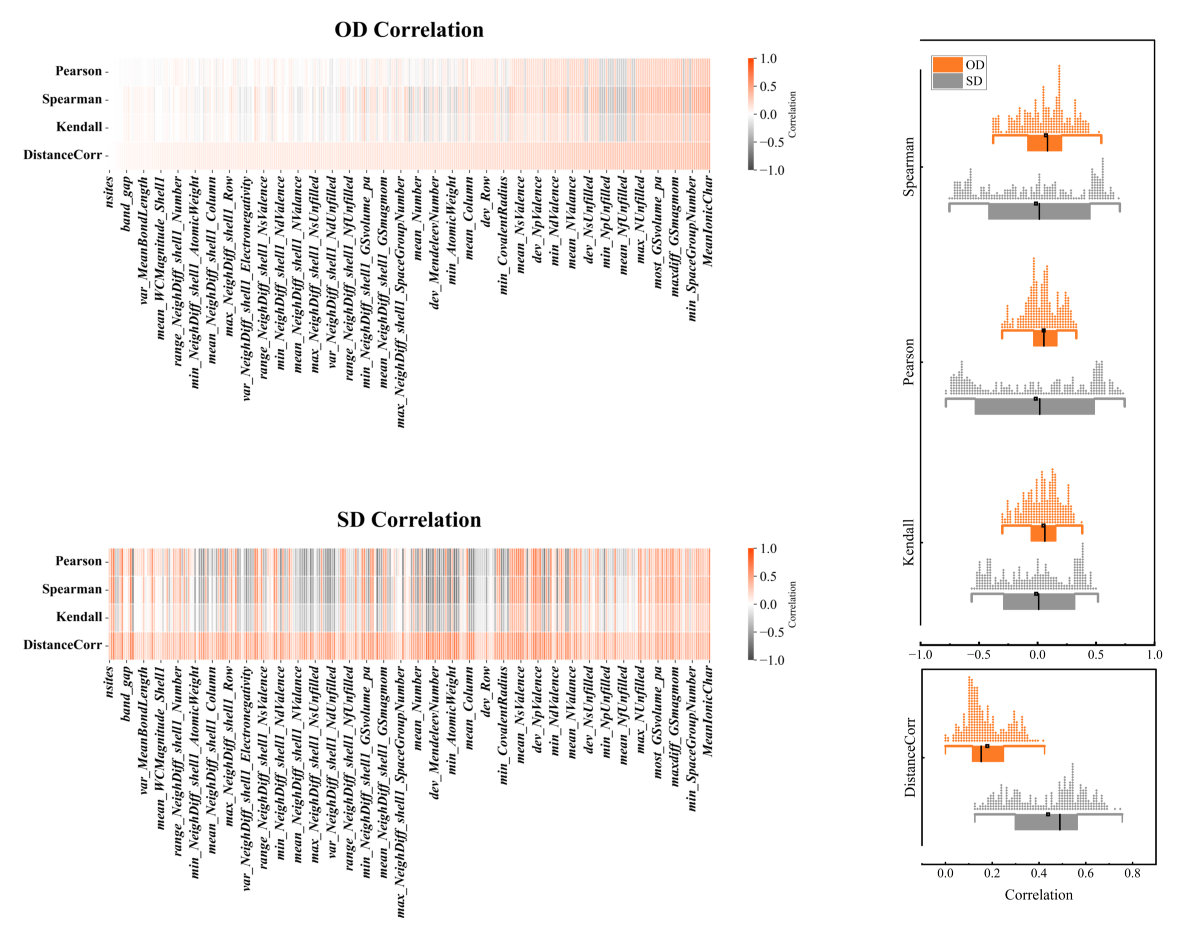

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

od_img = mpimg.imread('./outputs/fig/CorrelationPlot/OD_correlation.png')
sd_img = mpimg.imread('./outputs/fig/CorrelationPlot/SD_correlation.png')
box_img = mpimg.imread('./outputs/fig/CorrelationPlot/origin_boxplot.jpg')

fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(4, 4, figure=fig)

ax1 = fig.add_subplot(gs[0:2, 0:3])
ax1.imshow(od_img)
ax1.axis('off')

ax2 = fig.add_subplot(gs[2:4, 0:3])
ax2.imshow(sd_img)
ax2.axis('off')

ax3 = fig.add_subplot(gs[:, 3])
ax3.imshow(box_img)
ax3.axis('off')

plt.tight_layout()
plt.show()


This comprehensive pipeline allows for direct comparison between transformed and original feature correlations, aiding in feature selection, interpretation, and model diagnostics.